# Problem Set 3 Notebook 

### Contributors : 
* Nourchene Ben Romdhane
* Firas Kanoun
* Zeineb Sahnoun
* Sami Ben Hassen

# Relevant Imports

In [247]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import TransformerMixin
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, validation_curve, ShuffleSplit, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import linear_model, datasets, svm
from sklearn.metrics import auc, confusion_matrix, make_scorer, roc_auc_score, roc_curve, recall_score, f1_score, precision_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier 
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from xgboost import XGBClassifier

# Data Description:

In [3]:
path = 'Telco-Customer-Churn.csv'
data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for column in all_data.columns:
    print(column,all_data[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

**As we can see above, most of the features are categorical, most of the time containing only two or three possible values. The only features that are not categorical are : CustomerID, SeniorCitizen, Monthly charges, Total charges and Tenure.
We will start our analysis by looking at these continuous features and then look at categorical ones.**

# Data Distribution and Preprocessing :

## Continuous Data :

### Tenure: 
This feature represents the number of months the customer has stayed with the company

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


Text(0.5, 0, 'Tenure')

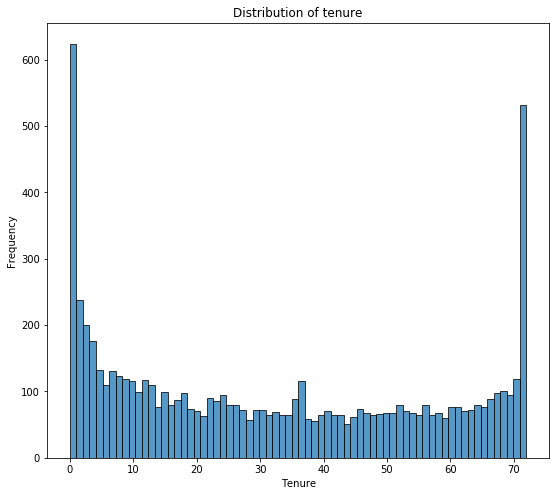

In [6]:
print(data['tenure'].describe())
plt.figure(figsize=(9, 8))
plt.hist(data['tenure'], bins=70, alpha=0.75, edgecolor='black')
plt.title('Distribution of tenure')
plt.ylabel('Frequency')
plt.xlabel('Tenure')

**We can see that the Telco company has a very large number of new clients (25% of the customers have subscribed since less than 1year and 3months ago) but also a very large number of "old" clients (25% of the customers have been with the company for more than 5years)**

**We can then say that the company is doing good in attracting new customers but also in keeping the old ones**

**This small analysis also tells us that this study have been conducted for a period of 72/12 = 6 years, since it is the highest value of tenure.**

**The large value that represents more than 10% of the clients having tenure equal to 6 years may be explained by the launching of the Telco company which attracted a lot of users (probably because of a launching deal).**

### Monthly Charges:
This feature represents the amount charged to the customer monthly

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


Text(0.5, 0, 'MonthlyCharges')

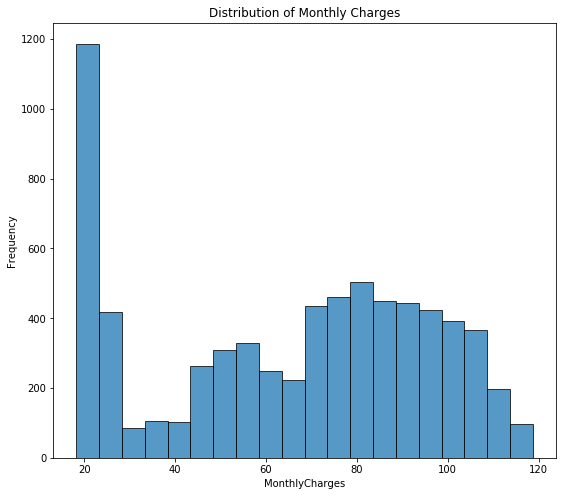

In [7]:
print(data['MonthlyCharges'].describe())
plt.figure(figsize=(9, 8))
plt.hist(data['MonthlyCharges'], bins=20, alpha=0.75, edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.ylabel('Frequency')
plt.xlabel('MonthlyCharges')

**As we can see, the plot here is skewed to the left which means that most clients have low monthly charges.**

### Total Charges:

This features represents the total amount charged to the customer. The type of this feature should be float, but we saw in the beginning of the analysis that it is of type string. We will change it to float as it should be.

When inspecting the values of this column we saw that there are many missing entries. We will try to plot the distribution of this feature without these values and then change these missing entries to the median of the column. 

In [8]:
data[data['TotalCharges']==' '].head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


Text(0.5, 0, 'TotalCharges')

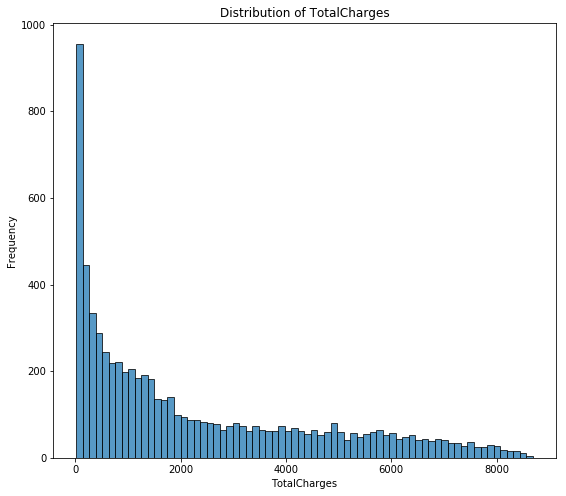

In [9]:
TotalCharges = data['TotalCharges'][data['TotalCharges']!=' '].astype('float')
plt.figure(figsize=(9, 8))
plt.hist(TotalCharges, bins=70, alpha=0.75, edgecolor='black')
plt.title('Distribution of TotalCharges')
plt.ylabel('Frequency')
plt.xlabel('TotalCharges')

In [10]:
len(TotalCharges[TotalCharges<500])/len(TotalCharges)

0.2844141069397042

**We can see that the total charges decay exponentially, meaning that most of the clients pay small charges. Indeed, more than 28% of the clients pay less than 500 euros as total charges**

In [11]:
#Setting the empty strings to the median value of the feature
data['TotalCharges'][data['TotalCharges']==' ']= TotalCharges.median()

#Transforming the feature into float
data['TotalCharges'] = data['TotalCharges'].astype('float')

### Correlation between Total and Monthly Charges :
An idea one can have here is to look at the correlation of monthly and total charges.

In [12]:
data[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650864
MonthlyCharges,0.650864,1.000000


**The pearson correlation coefficient is equal to 0.65. This confirms our intuition that these two features are positively correlated. A person who pays high monthly charges also pays high total charges.**

### SeniorCitizen
Whether the customer is a senior citizen or not, meaning he is more than 50 years old or not.

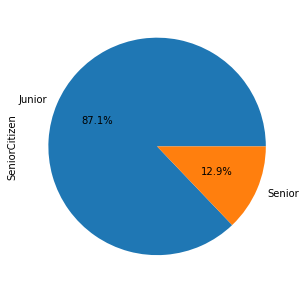

In [31]:
plt.figure(figsize=(5,5))
data["SeniorCitizen"].value_counts().plot(kind='pie', labels = ['Junior', 'Senior'],autopct='%1.1f%%')

**This shows that most of the clients of the data set (almost 90%) are below 50 years old.**

## Categorical Data:

In [178]:
data.select_dtypes(include='object').describe().transpose().sort_values('unique')

,count,unique,top,freq
Churn,7043,2,No,5174
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
PaperlessBilling,7043,2,Yes,4171
Contract,7043,3,Month-to-month,3875
StreamingMovies,7043,3,No,2785
StreamingTV,7043,3,No,2810
TechSupport,7043,3,No,3473


**Above you can see the different values and distribution of all categorical features. Let's study them in depth and then encode them for the prediction. We can drop the customerID since it's of typre object and we already have an indexing of the data.**

In [179]:
encoded_data = data.copy()
encoded_data.drop(columns = ['customerID'], inplace = True)
encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Gender :
Whether the customer is a male or a female

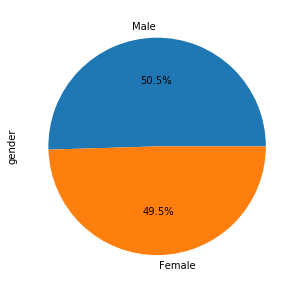

In [180]:
plt.figure(figsize=(5,5))
data["gender"].value_counts().plot(kind='pie',  autopct='%1.1f%%')

**As we can see here, that the customers are balanced between male and female. Let's now encode this categorical feature.**

In [181]:
label_enc_gender= LabelEncoder()
gender_encoded = label_enc_gender.fit_transform(encoded_data.gender)
encoded_data['gender']=gender_encoded

### Partner
Whether the customer has a partner or not (Yes, No)

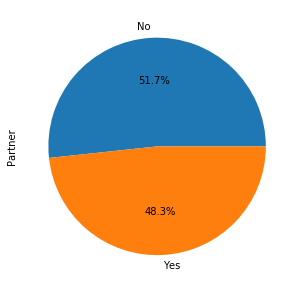

In [182]:
plt.figure(figsize=(5,5))
data["Partner"].value_counts().plot(kind='pie', autopct='%1.1f%%')

**This shows that the dataset is balanced in terms of clients who have partners and clients who don't.**

In [183]:
label_enc_partner= LabelEncoder()
partner_encoded = label_enc_partner.fit_transform(encoded_data.Partner)
encoded_data['Partner']=partner_encoded

### Dependents
Whether the customer has dependents or not.

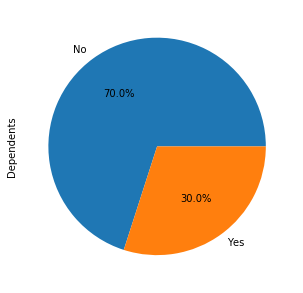

In [184]:
plt.figure(figsize=(5,5))
data["Dependents"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**This shows that most of the clients of the data set don't have dependants. Meaning that most of them have personal phone lines.**

In [185]:
label_enc_dependents= LabelEncoder()
dependents_encoded = label_enc_dependents.fit_transform(encoded_data.Dependents)
encoded_data['Dependents']=dependents_encoded

### PhoneService
Whether the customer has a phone service or not (Yes, No)

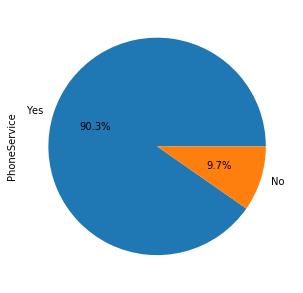

In [186]:
plt.figure(figsize=(5,5))
data["PhoneService"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**As expected from phone company subscriptions, most of the clients (more than 90%) have access to phone service.**

In [187]:
label_enc_ph= LabelEncoder()
ph_encoded = label_enc_ph.fit_transform(encoded_data.PhoneService)
encoded_data['PhoneService']=ph_encoded

### MultipleLines
Whether the customer has multiple lines in his subscription or not (Yes, No, No phone service)

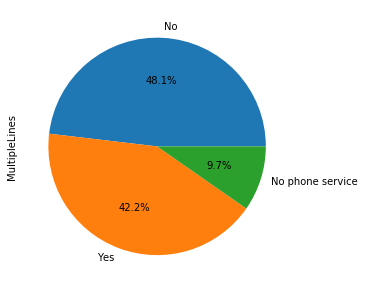

In [188]:
plt.figure(figsize=(5,5))
data["MultipleLines"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**We can see here that almost half the clients who have a phone subscription have multiple lines. So our data set is quiete balanced between single line clients and multiple line ones.**

In [189]:
label_enc_ML= LabelEncoder()
ML_encoded = label_enc_ML.fit_transform(encoded_data.MultipleLines)
encoded_data['MultipleLines']=ML_encoded

### InternetService
Customer’s internet service provider (DSL, Fiber optic, No)

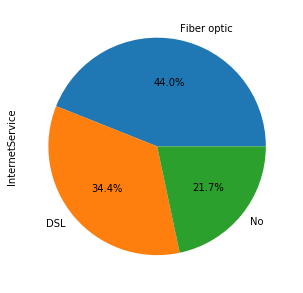

In [190]:
plt.figure(figsize=(5,5))
data["InternetService"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**This distribution shows us the different internet service providers distributions. We can see that clients are more interested in the optical fiber than. We can also note that only 21.7% have no internet subscription, which confirms the importance of internet in a phone subscription.**

In [191]:
IS_mapper = {'DSL':1,'Fiber optic':2,'No':0}
encoded_data['InternetService'] = encoded_data['InternetService'].replace(IS_mapper)

### OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)

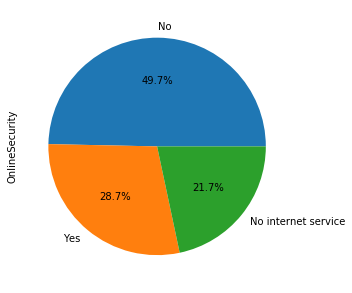

In [192]:
plt.figure(figsize=(5,5))
data["OnlineSecurity"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**This shows that online security is not a must for clients when subscribing in a phone company. As we can see, more than half ot the clients who have internet service, don't use online security.** 

In [193]:
OS_mapper = {'No internet service':1,'Yes':2,'No':0}
encoded_data['OnlineSecurity'] = encoded_data['OnlineSecurity'].replace(OS_mapper)

### OnlineBackup
Whether the customer has online backup or not, meaning that a client has a copy of his data stored in the cloud (Yes, No, No internet service).

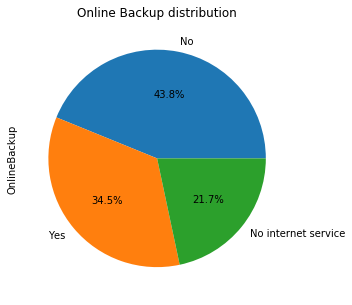

In [194]:
plt.figure(figsize=(5,5))
data["OnlineBackup"].value_counts().plot(kind='pie', title="Online Backup distribution",autopct='%1.1f%%')

**This shows that online back up is not a must feature neither for clients when subscribing in a phone company. As we can see, only half of them have this option activated.**

In [195]:
encoded_data['OnlineBackup'] = encoded_data['OnlineBackup'].replace(OS_mapper)

### Correlation of Online security, Online backup
As we can see from above, the distribution of the two last features look almost the same. The idea here is to look at these variables and try to show if there is any relation. 

In [196]:
crosstab = pd.crosstab(data['OnlineSecurity'],data['OnlineBackup'])
crosstab

OnlineBackup,No,No internet service,Yes
OnlineSecurity,,,
No,2195,0,1303
No internet service,0,1526,0
Yes,893,0,1126


In [197]:
data.shape

(7043, 21)

A first look at the contingency table of these two variables show that a client is more likely to have online back up activated when he has online security activated. Indeed, for clients who have online security, 55% of them have online backup. Plus, for clients who don't have online security only 37% of them have online back up activated. This shows that there is a relation between these two variables. Let's use chi-square test to confirm this hypothesis.

   **H0 (Null Hypothesis): There is no relationship between online backup and online security**
   
   **H1 (Alternative Hypothesis): There is a relationship between online backup and online security**

In [198]:
stats.chi2_contingency(crosstab)

(7270.460646541005,
 0.0,
 4,
 array([[1533.69643618,  757.90827772, 1206.3952861 ],
        [ 669.07397416,  330.63694448,  526.28908136],
        [ 885.22958966,  437.45477779,  696.31563254]]))

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'online backup' and 'online security'. We don't know what the relationship is, but we do know that these two variables are not independent of each other. A possible interpretation is that these two options are sold in a single package and people who generally subscribe for one option end up having the second. These clients seem to be clients who have important/sensible data in their phones, the reason why they pay extra money to secure it as we can see in the next two calculations.

In [199]:
data[data['OnlineBackup']=='Yes']['TotalCharges'].mean()

3872.8405516673524

In [200]:
data[data['OnlineBackup']=='No']['TotalCharges'].mean()

1828.0088973445595

As we can see here, clients who have online backup activated pay in average twice as much as clients who don't. 

### DeviceProtection
Whether the customer has device protection or not (Yes, No, No internet service)

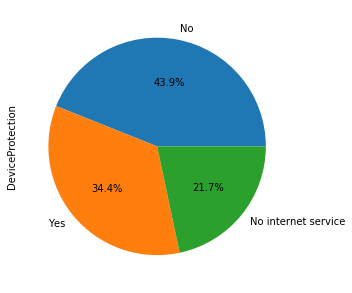

In [201]:
plt.figure(figsize=(5,5))
data["DeviceProtection"].value_counts().plot(kind='pie', autopct='%1.1f%%')

**This shows that device protection is not a is not a must feature neither. As we can see, half of the clients have this option activated.**

In [202]:
encoded_data['DeviceProtection'] = encoded_data['DeviceProtection'].replace(OS_mapper)

### TechSupport
Whether the customer has tech support or not (Yes, No, No internet service)

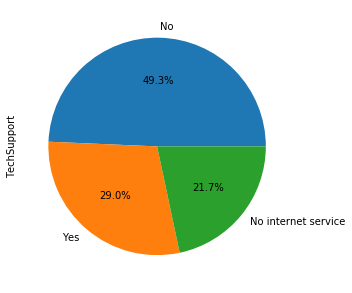

In [203]:
plt.figure(figsize=(5,5))
data["TechSupport"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**We can see here that among clients who have internet service approximately 40% use technical support and 60% don't. So we can say it's not a very important service neither.**

In [204]:
encoded_data['TechSupport'] = encoded_data['TechSupport'].replace(OS_mapper)

### StreamingTV
Whether the customer has streaming TV or not (Yes, No, No internet service)

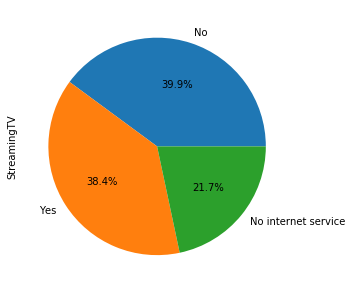

In [205]:
plt.figure(figsize=(5,5))
data["StreamingTV"].value_counts().plot(kind='pie',autopct='%1.1f%%')

***We see here that the distribution is symmetric. Indeed, clients who have internet subscription are equally divided between clients who have streaming TV subscription and clients who don't.***

In [206]:
encoded_data['StreamingTV'] = encoded_data['StreamingTV'].replace(OS_mapper)

### StreamingMovies
Whether the customer has streaming movies or not (Yes, No, No internet service)

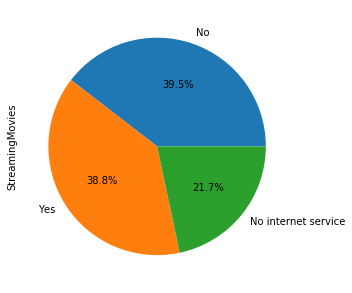

In [207]:
plt.figure(figsize=(5,5))
data["StreamingMovies"].value_counts().plot(kind='pie',autopct='%1.1f%%')

***We see here that the distribution is also symmetric. Indeed, clients who have internet subscription are equally divided between clients who have streaming Movies subscription and clients who don't.***

In [208]:
encoded_data['StreamingMovies'] = encoded_data['StreamingMovies'].replace(OS_mapper)

### Correlation of Streaming TV, Streaming movies
As we can see from above, the distribution of the two last features look almost the same. The idea here is to look at these variables and try to show if there is any relation. 

In [209]:
crosstab = pd.crosstab(data['StreamingTV'],data['StreamingMovies'])
crosstab

StreamingMovies,No,No internet service,Yes
StreamingTV,,,
No,2018,0,792
No internet service,0,1526,0
Yes,767,0,1940


A first look at the contingency table of these two variables show that a client is more much more likely to have streaming TV activated when he has streaming movies activated. Indeed, for clients who have streaming TV, more than 71% of them have streaming movies. Plus, for clients who don't have streaming TV only 28% of them have streaming movies activated. This shows that there is a relation between these two variables. Let's use chi-square test to confirm this hypothesis.

   **H0 (Null Hypothesis): There is no relationship between streaming TV and streaming movies**
   
   **H1 (Alternative Hypothesis): There is a relationship between streaming TV and streaming movies**

In [210]:
stats.chi2_contingency(crosstab)

(8374.206314231764,
 0.0,
 4,
 array([[1111.15291779,  608.83998296, 1090.00709925],
        [ 603.42325713,  330.63694448,  591.93979838],
        [1070.42382507,  586.52307255, 1050.05310237]]))

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'StreamingTV' and 'StreamingMovies'. We don't know exactly what the relationship is, but we do know that these two variables are not independent of each other. A possible interpretation is that these two options are also sold in a sort of package and people who generally subscribe for one option end up having the second.

### Contract
The contract term of the customer (Month-to-month, One year, Two year)

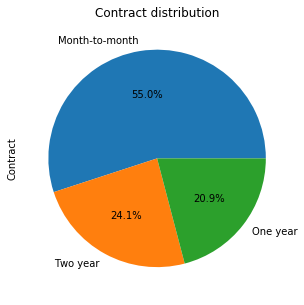

In [211]:
plt.figure(figsize=(5,5))
data["Contract"].value_counts().plot(kind='pie', title="Contract distribution",autopct='%1.1f%%')

**The distribution here of contract types is quiete assymetric. Indeed, 55% of the clients opt for monthly contracts. The other half is almost equally divided between clients who have a one-year subscriptions and others who have two-year subscriptions. This shows that clients are more comfortable with monthly contracts rather than commitments of one or two years due to the fact that short contracts make it easier for them to churn.**

In [212]:
label_enc_contract= LabelEncoder()
contract_encoded = label_enc_contract.fit_transform(encoded_data.Contract)
encoded_data['Contract']=contract_encoded

### PaperlessBilling
Whether the customer has paperless billing or not (Yes, No)

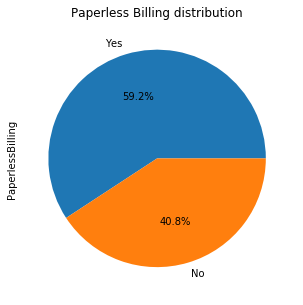

In [213]:
plt.figure(figsize=(5,5))
data["PaperlessBilling"].value_counts().plot(kind='pie', title="Paperless Billing distribution",autopct='%1.1f%%')

In [214]:
label_enc_paper= LabelEncoder()
paper_encoded = label_enc_paper.fit_transform(encoded_data.PaperlessBilling)
encoded_data['PaperlessBilling']=paper_encoded

### PaymentMethod
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

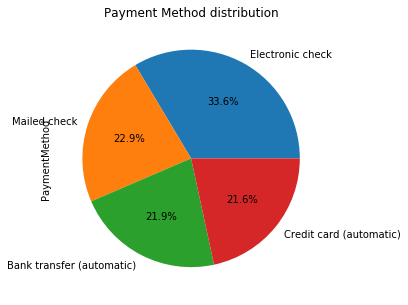

In [215]:
plt.figure(figsize=(5,5))
data["PaymentMethod"].value_counts().plot(kind='pie', title="Payment Method distribution",autopct='%1.1f%%')

**We can see here that the payment methods are almost equally distributed between electronic check, mailed check, credit card payments and bank transfers, with the prefered payment method being the Electronic check**

In [216]:
label_enc_payment= LabelEncoder()
payment_encoded = label_enc_payment.fit_transform(encoded_data.PaymentMethod)
encoded_data['PaymentMethod']=payment_encoded

## Correlation Study

 In this section, we are interested to know which features play a role in knowing if a costumer is loyal or not. We will look at two of the features from our data set and use chi-square tests to see if these features are important to predict customer's loyalty .
 
 We have 2 possible hypotheses for the ChiSquare test :
 
   **H0 (Null Hypothesis): There is no relationship between the first and the second variable.**
   
   **H1 (Alternative Hypothesis): There is a relationship between the first and the second variable.**

### Correlation between Online Security and Churn

In [217]:
# Contingency table
crosstab = pd.crosstab(data['OnlineSecurity'], data['Churn'])
stats.chi2_contingency(crosstab)

(849.9989679615965,
 2.661149635176552e-185,
 2,
 array([[2569.73619196,  928.26380804],
        [1121.04557717,  404.95442283],
        [1483.21823087,  535.78176913]]))

**The first value (849.99) is the Test Statistic value, followed by the p-value (2.66e-185), then comes the degrees of freedom (2), and lastly it outputs the expected frequencies as an array. We can reject the null hypothesis at significance level 95% since the p-value is less than 0.05. Thus, the results indicate that there is a relationship between Online Security and loyalty to the company.**

### Correlation between the gender of the user and Churn

In [218]:
# contingency table
crosstab = pd.crosstab(data['gender'], data['Churn'])
stats.chi2_contingency(crosstab)

(0.4840828822091383,
 0.48657873605618596,
 1,
 array([[2562.38989067,  925.61010933],
        [2611.61010933,  943.38989067]]))

**We can see that the Test statistic is equal to 0.484, the p value is equal to 0.486 and the degree of freedom is 1. Since the p-value is a lot greater than 0.05, this means that we cannot reject the null hypothesis, and that the gender may not play a role in regards to being loyal to the company which seems very logical.**

NB : The other features can be studied in the same way, here we provided examples of 2 different outcomes of the chi-square test.

# Predicting Churn

In this part, we will study several models to predict customer behavior (churn), and finally give the best of them. This prediction problem is hence a binary classification, where the target feature (churn) is equal to 0 if a costumer leaves the company, and 1 if he is loyal.

In [219]:
#target encoding 

label_enc_target= LabelEncoder()
churn_encoded = label_enc_target.fit_transform(encoded_data.Churn)
encoded_data['Churn']=churn_encoded

In [220]:
target = encoded_data.Churn
features = encoded_data.drop(columns = ['Churn'])
features.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,1,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,1,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,1,2,2,0,0,0,0,0,1,3,53.85,108.15


Many classifiers work on standardized features (logistic). Moreover, normalization might improve convergence speed due to more smooth optimization surface. We will standerdize the features and we can then compare the performance of some models according to the input (standardized data or not) they are given. 

In [221]:
def standerdize(df, col):
    df_stand = df.copy()
    for col in list(col):
        df_stand[col] = ((df_stand[col]-df_stand[col].mean())/df_stand[col].std())
        
    return df_stand
        

features_list = list(features.columns)
stand_feat = standerdize(features, features_list)
stand_feat.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009487,-0.439885,1.034457,-0.653965,-1.277354,-3.053794,0.062718,-0.286202,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,-1.160241,-0.994171
1,0.990462,-0.439885,-0.966554,-0.653965,0.066323,0.327415,-0.991518,-0.286202,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,0.371245,-1.205028,1.334768,-0.259611,-0.173232
2,0.990462,-0.439885,-0.966554,-0.653965,-1.236636,0.327415,-0.991518,-0.286202,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,-0.362635,-0.959606


**We finally obtained our encoded data and target, we now need to divide it into training and test sets.**

In [224]:
seed = 2
#Split standardized features
X_train, X_test, y_train, y_test = train_test_split(stand_feat, target, test_size = 0.2, random_state = seed)

#Split normal features
''' Remove comment from this line to use non-normalized features'''
#X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(features, target, test_size = 0.2, random_state = seed)

' Remove comment from this line to use non-normalized features'

We need to separate a part of the training set known as validation set. We can then tune parameters by measuring their performance on the validation set. Finally we obtain the test score by training our model on the training set and measuring its performance on the test set.
We divide data into training (60%), validation (20%) and test sets (20%).

In [228]:
seed = 1

# Separate target and features into test, training, and validation sets

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = seed)

## 1. Logistic Regression Model :

### Hyper-parameter tuning

In [231]:
estimators = []
estimators.append(('lr_clf', LogisticRegression()))
pipeline = Pipeline(estimators)
pipeline.set_params(lr_clf__penalty='l1')

# Finding best value of C parameter using validation set
scores = []
Cs = []
for C in np.logspace(-4, 5, 10):
    pipeline.set_params(lr_clf__C=C) 
    pipeline.fit(X_train_train,y_train_train)
    y_train_pred = pipeline.predict(X_train_val)
    scores.append(accuracy_score(y_train_val, y_train_pred))
    Cs.append(C)

best_C = Cs[scores.index(max(scores))]
print ('best C = %d with auc score = %2.4f' %(best_C, max(scores)))

best C = 1 with auc score = 0.8041


### Performance of the tuned model on test set

In [232]:
pipeline.set_params(lr_clf__penalty='l1')
pipeline.set_params(lr_clf__C=best_C)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print ('Logistic regression classifer score with l1 regularization = %2.4f' %score)

Logistic regression classifer score with l1 regularization = 0.8084


### Roc Curve 

Area Under Curve Score : 0.8399796331805822


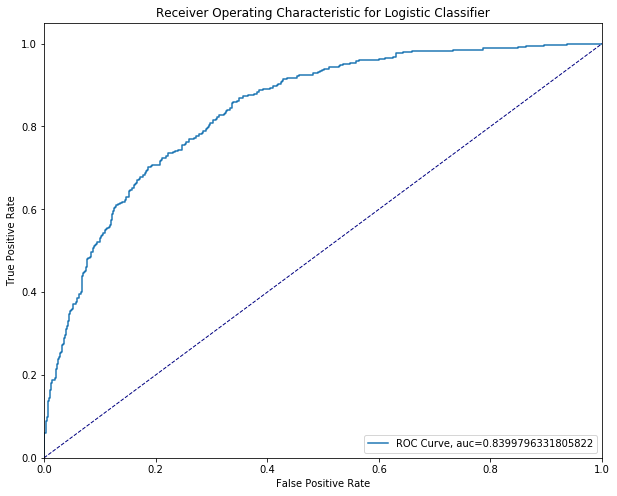

In [236]:
y_pred_lr = pipeline.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_lr[:,1])
auc_LR = roc_auc_score(y_test, y_pred_lr[:,1])

print("Area Under Curve Score : " + str(auc_LR))

#PLOT ROC
lw = 1
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label= 'ROC Curve, auc='+str(auc_LR))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Classifier')
plt.show()

## 2. Gradient boosted trees model :

Function for nested cross-validation, useful for tuning the hyper parameters n_estimators.

In [239]:
def nested_cv(X, y, est_pipe, p_grid, p_score, n_splits_inner = 3, n_splits_outer = 3, n_cores = 1, seed = 0):
    ests = []
    # cross-validation schema for inner and outer loops
    inner_cv = StratifiedKFold(n_splits = n_splits_inner, shuffle = True, random_state = seed)
    outer_cv = StratifiedKFold(n_splits = n_splits_outer, shuffle = True, random_state = seed)

    # grid search to tune hyper parameters
    est = GridSearchCV(estimator = est_pipe, param_grid = p_grid, cv = inner_cv, scoring = p_score, n_jobs = n_cores)
    ests.append(est)
    # nested CV with parameter optimization
    nested_scores = cross_val_score(estimator = est, X = X, y = y, cv = outer_cv, scoring = p_score, n_jobs = n_cores)
    
    print('Average score: %0.4f (+/- %0.4f)' % (nested_scores.mean(), nested_scores.std() * 1.96))
    
    return nested_scores, ests

### Hyper-parameter tuning

In [243]:
seed=0

array = []
array.append(('XGB_clf', XGBClassifier()))
pipe = Pipeline(array)
pipe.set_params(XGB_clf__random_state = seed)

# Possible optimized values 
p_grid = {"XGB_clf__n_estimators": [int(i) for i in np.linspace(10.0, 40.0, 5)]}

nested_scores_xgb, ests_xgb = nested_cv(X = stand_feat, y = target, est_pipe = pipe, p_grid = p_grid, p_score = 'accuracy', n_cores = -1)
optimal_param = list(p_grid.values())[0][np.argmax(nested_scores_xgb)]
print('Optimal n_estimators value : '+str(optimal_param))

Average score: 0.8016 (+/- 0.0118)
Optimal n_estimators value : 10


### Performance of the tuned model on test set

In [244]:
optimal_xgb =  XGBClassifier(n_estimators=optimal_param)
optimal_xgb.fit(X_train,y_train)
xgb_pred = optimal_xgb.predict(X_test)
score = accuracy_score(y_test, xgb_pred)

print("Optimal Gradient Boosted trees model score : " + str(score))

Optimal Gradient Boosted trees model score : 0.8097941802696949


### Roc Curve 

Gradient Boosted trees model AUC score : 0.8304313324016597


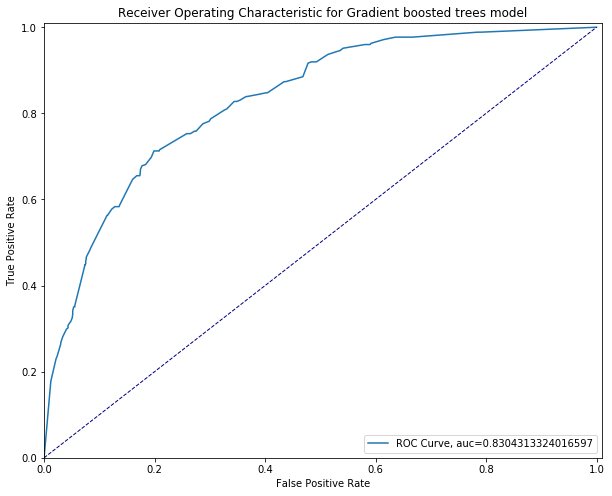

In [245]:
xgb_prob = optimal_xgb.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, xgb_prob)

auc_xgb = roc_auc_score(y_test, xgb_prob)

print("Gradient Boosted trees model AUC score : " + str(auc_xgb))

plt.figure(figsize=(10,8))
plt.plot(fpr_xgb, tpr_xgb, label= 'ROC Curve, auc='+str(auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gradient boosted trees model')
plt.show()

## 3. Random Forest:

### Hyper-parameter tuning

In [248]:
# Define a random classifier pipeline
estimators = []
estimators.append(('rf_clf', RandomForestClassifier()))
pipeline = Pipeline(estimators)
pipeline.set_params(rf_clf__random_state = seed)
    
# Finding best value of n_estimators using validation set
scores = []
NSs = []
for NS in [int(i) for i in np.linspace(10, 100, 10)]:
    pipeline.set_params(rf_clf__n_estimators = NS) 
    pipeline.fit(X_train_train,y_train_train)
    y_train_pred = pipeline.predict(X_train_val)
    scores.append(accuracy_score(y_train_val, y_train_pred))
    NSs.append(NS)

best_NS = NSs[scores.index(max(scores))]
print ('best NS = %d with auc score = %2.4f' %(best_NS, max(scores)))

best NS = 50 with auc score = 0.7999


### Performance of the tuned model on test set

In [250]:
# Performance of the tuned model on test set
pipeline.set_params(rf_clf__n_estimators = best_NS)
pipeline.fit(X_train,y_train)
y_pred_rf = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred_rf)
print ('Random Forest Classifier accuracy score = %2.4f' %score)

Random Forest Classifier accuracy score = 0.7999


### Roc Curve 

Area under curve score : 0.8166187288071327


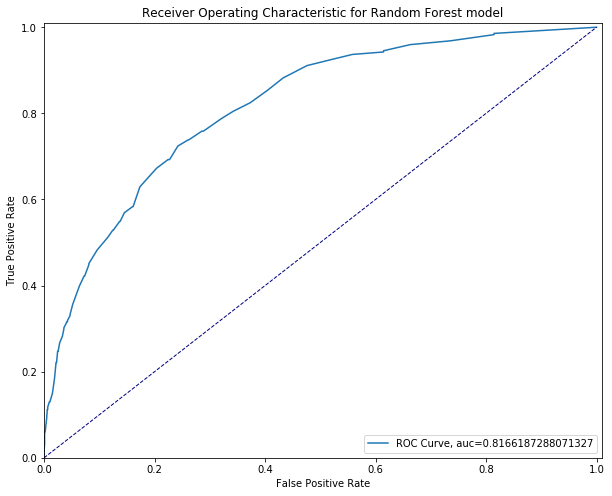

In [251]:
rf_prob = pipeline.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

print("Area under curve score : " + str(auc_rf))

plt.figure(figsize=(10,8))
plt.plot(fpr_rf, tpr_rf, label= 'ROC Curve, auc='+str(auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest model')
plt.show()

## 4. KNN :

In [252]:
# creating odd list of K for KNN
numbers = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, numbers))

# empty list that will hold cv scores
cv_scores = []

# perform 5-fold cross validation
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


# determining best number of neighbors n
optimal_n = neighbors[np.argmax(cv_scores)]
print("The optimal number of neighbors is %d" % optimal_n)

The optimal number of neighbors is 29


### Performance of the tuned model on test set

In [253]:
knn = KNeighborsClassifier(n_neighbors=optimal_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

score = accuracy_score(y_test, y_pred)

print("KNN Accuracy score : " + str(score))

KNN Accuracy score : 0.7863733144073811


### Roc Curve 

The auc score for KNN : 0.8167365421907331


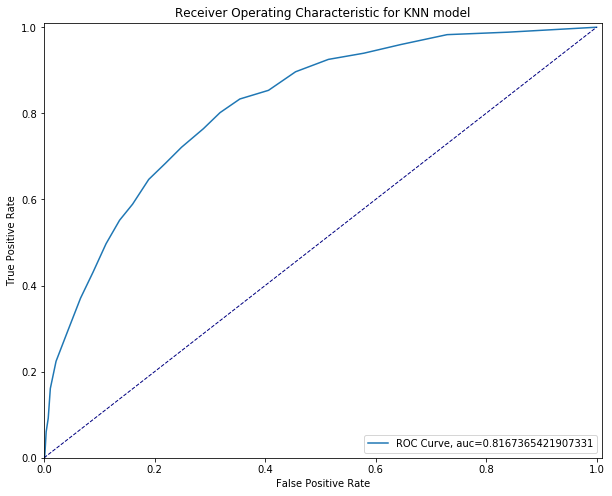

In [254]:
y_prob = knn.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("The auc score for KNN : " + str(auc))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label= 'ROC Curve, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN model')
plt.show()

## Best model : 

**We can see that from the proposed models the best one is the Gradient Boosted trees with an accuracy of 0.8098, hence we can predict almost 81% of costumer loyalty correctly.**